In [1]:
%load_ext autoreload
%autoreload 2

1960     -70.411324
3960     -56.340233
5960     -47.935195
7960     -55.285258
9960     -47.023869
            ...    
423960   -18.343636
425960   -13.426638
427960   -17.969481
429960   -14.922562
431960   -21.116579
Name: test-return, Length: 216, dtype: float64
Int64Index([  1960,   3960,   5960,   7960,   9960,  11960,  13960,  15960,
             17960,  19960,
            ...
            413960, 415960, 417960, 419960, 421960, 423960, 425960, 427960,
            429960, 431960],
           dtype='int64', length=216)


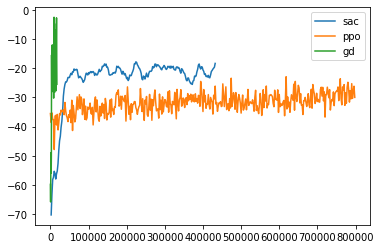

"\nout = pd.DataFrame({\n    'sac': sac,\n    'ppo': ppo,\n    'gd': gd\n})[:100]\n"

In [16]:
import pandas as pd

ppo = pd.read_csv('../model/ppo_fixmove/progress.csv')
ppo = ppo['reward_mean']*40
ppo.index = ppo.index*2000
ppo = ppo[:400]

sac = pd.read_csv('../model/sac_fixmove/progress.csv')
sac = sac['test-return'].dropna()

from collections import deque
import numpy as np
means = deque(maxlen=10)
sac.index = sac.index * 40
outs = []
print(sac)
for i in sac:
    means.append(i)
    outs.append(np.mean(means))
print(sac.index)
sac = pd.Series(outs, sac.index)


gd = pd.read_csv('../model/gd_fixmove/progress.csv')['train/reward']
gd.index = gd.index * (5 * 10 * 10)

#sac.plot(label='sac')
plt.plot(sac.index, sac.values, label='sac')
ppo.plot(label='ppo')
gd.plot(label='gd')
import matplotlib.pyplot as plt
plt.legend()
plt.show()
"""
out = pd.DataFrame({
    'sac': sac,
    'ppo': ppo,
    'gd': gd
})[:100]
"""

#out.plot()